#Wine Dataset - KNN

## Libraries

In [1]:
#Importing required Libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

##Loading Dataset

In [2]:
#Loading Dataset
data = load_wine()
X = data.data
Y = data.target

In [3]:
#sklearn datset into pandas dataframe
dt = pd.DataFrame(data= np.c_[data['data'], data['target']],columns= data['feature_names'] + ['target'])
dt.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
#data description
dt.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
#Dataset Attributes
print(data.feature_names)
print("Number of Rows = ",X.shape[0])
print("Number of independent Variables/ Columns = ",X.shape[1])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Number of Rows =  178
Number of independent Variables/ Columns =  13


##Labels for data

In [6]:
#Labels for classification
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## Feature Scaling

13.00061797752809  :  alcohol
2.3363483146067416  :  malic_acid
2.3665168539325845  :  ash
19.49494382022472  :  alcalinity_of_ash
99.74157303370787  :  magnesium
2.295112359550562  :  total_phenols
2.0292696629213487  :  flavanoids
0.3618539325842696  :  nonflavanoid_phenols
1.5908988764044945  :  proanthocyanins
5.058089882022472  :  color_intensity
0.9574494382022471  :  hue
2.6116853932584267  :  od280/od315_of_diluted_wines
746.8932584269663  :  proline


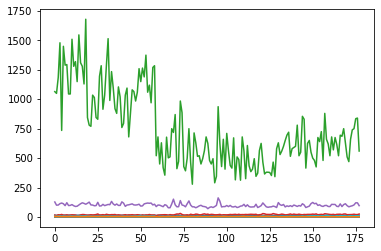

In [7]:
#Feature Scaling
#Print Mean of Features
for x,y in zip(X.T,data.feature_names):
  print(np.mean(x)," : ",y)
# Plot Features
plt.plot(X)  
plt.show()

shape =  (13, 178)


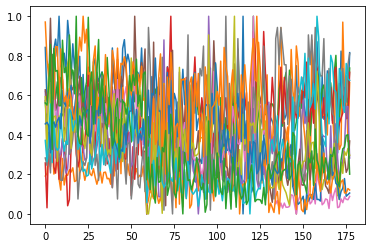

In [8]:
#Scaling Features & Plot
scaled = []
for x in X.T:
  l = []
  for y in x:
    k = (y-min(x))/(max(x)-min(x))
    l.append(k)
  scaled.append(l)

scaled = np.array(scaled)
print("shape = ",scaled.shape)
plt.plot(scaled.T)
plt.show()

## Train Test Split

In [9]:
#Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(scaled.T, Y, test_size=0.33, random_state=1)

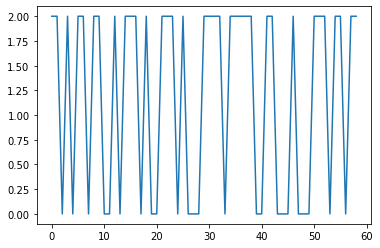

In [12]:
q = []
for x in Y_test:
  if(x<=0.33):
      q.append(0)
  if(x<0.66 and x>0.33):
    q.append(1)
  if(x>0.66):
    q.append(2)

plt.plot(q)

##K- Nearest Neighbour

In [16]:
#Training using Variations of K- Nearest Neighbours 
algorithms = ["ball_tree", "kd_tree", "brute"]

In [17]:
for x in algorithms:
  print("Algorithm = ",x)
  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(X_train, Y_train)
  train.append(neigh.score(X_train,Y_train))
  test.append(neigh.score(X_test,Y_test))
  print("Training Accuracy : ",neigh.score(X_train,Y_train))
  print("Test Accuracy : ",neigh.score(X_test,Y_test))
  print()


Algorithm =  ball_tree
Training Accuracy :  0.9747899159663865
Test Accuracy :  0.9491525423728814

Algorithm =  kd_tree
Training Accuracy :  0.9747899159663865
Test Accuracy :  0.9491525423728814

Algorithm =  brute
Training Accuracy :  0.9747899159663865
Test Accuracy :  0.9491525423728814



##Plotting Accuracy

In [18]:
#Plotting Training & Testing Accuracies for all Variations
algo_list = ["k_ball_tree", "k_kd_tree", "k_brute"]

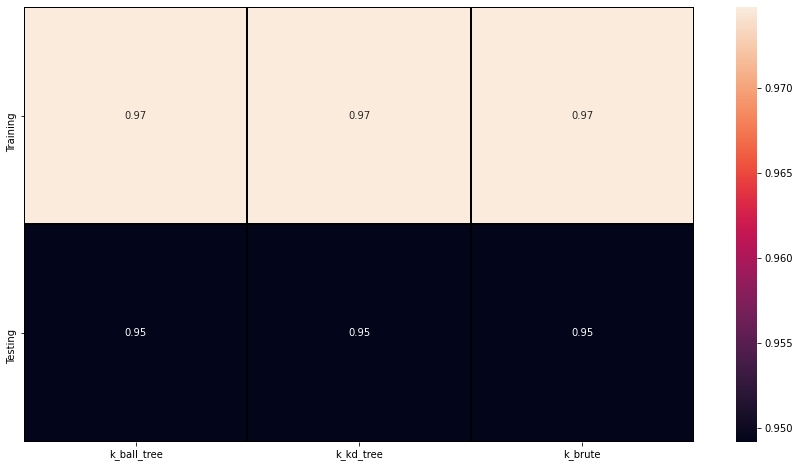

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap([train,test],xticklabels=algo_list,yticklabels=["Training","Testing"],annot=True, linewidths=1, linecolor='black')
plt.show()